<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/TTR_by_tokens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


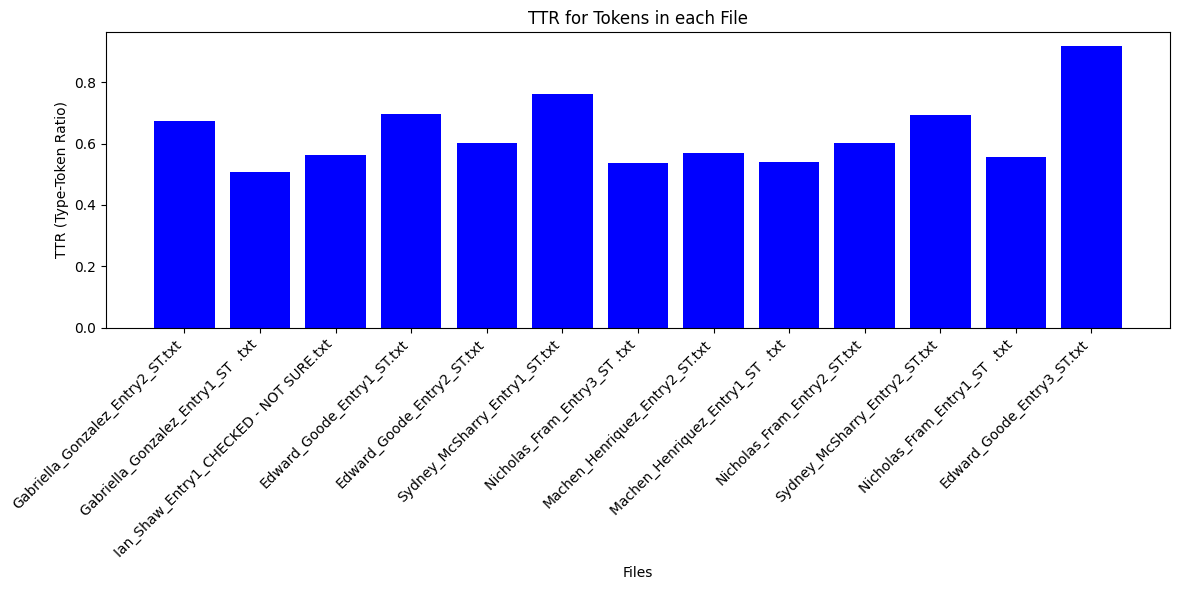

In [2]:
import os
import re
from collections import Counter
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Remove tags like <latincharacter="моя">моя</latincharacter>
    text = re.sub(r'<.*?>', '', text)
    # Remove [unclear]
    text = re.sub(r'\[unclear\]', '', text)
    return text

def calculate_ttr(tokens):
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    ttr = unique_tokens / total_tokens
    return ttr

def process_files(directory):
    ttr_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, "r", encoding="utf-8") as file:
                text = file.read()
                preprocessed_text = preprocess_text(text)
                tokens = word_tokenize(preprocessed_text)
                ttr = calculate_ttr(tokens)
                ttr_data[filename] = ttr
    return ttr_data

def plot_ttr(ttr_data):
    plt.figure(figsize=(12, 6))
    plt.bar(ttr_data.keys(), ttr_data.values(), color='b')
    plt.xticks(rotation=45, ha="right")
    plt.xlabel('Files')
    plt.ylabel('TTR (Type-Token Ratio)')
    plt.title('TTR for Tokens in each File')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    directory_path = "/content/Students_texts"
    ttr_data = process_files(directory_path)
    plot_ttr(ttr_data)